In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Create a DataFrame of the csv file.
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Display summary of the dataframe
print(df.info())

# By manual inspection, we can confirm that the 'id' column can be removed as it does not contain any
# relevant information
df.drop('id', axis = 1, inplace = True)

df['gender'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

# Data Preprocessing

In [ ]:
# Check the 'age' attribute values
df.age.sort_values()
temp_df_age = df[df['stroke'] == 1]['age']

df.info()

# Check the least values of 'age' attribute
print(temp_df_age.nsmallest(6))

# The age with value '1.32' seems invalid, it will be better to drop the instances with very small values of age
df = df[df['age'] > 13]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
162     1.32
245    14.00
182    32.00
118    38.00
133    38.00
49     39.00
Name: age, dtype: float64


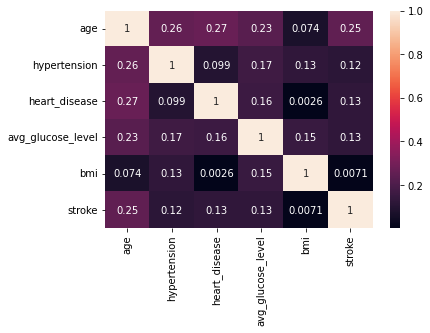

In [ ]:
# Check the correlation among features
sns.heatmap(df.corr(), annot = True)

In [ ]:
# Since there is only 1 row with the gender as 'Other', we can drop it as it won't be much relevant in the analysis and prediction
df = df.drop(df.loc[df['gender'] == 'Other'].index)
df['gender'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4464 non-null   object 
 1   age                4464 non-null   float64
 2   hypertension       4464 non-null   int64  
 3   heart_disease      4464 non-null   int64  
 4   ever_married       4464 non-null   object 
 5   work_type          4464 non-null   object 
 6   Residence_type     4464 non-null   object 
 7   avg_glucose_level  4464 non-null   float64
 8   bmi                4279 non-null   float64
 9   smoking_status     4464 non-null   object 
 10  stroke             4464 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 418.5+ KB


Number of rows in the dataframe: 4464
Number of missing values in bmi = 185
Column(s) with atleast one NULL value (missing value): ['bmi']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4464 non-null   object 
 1   age                4464 non-null   float64
 2   hypertension       4464 non-null   int64  
 3   heart_disease      4464 non-null   int64  
 4   ever_married       4464 non-null   object 
 5   work_type          4464 non-null   object 
 6   Residence_type     4464 non-null   object 
 7   avg_glucose_level  4464 non-null   float64
 8   bmi                4279 non-null   float64
 9   smoking_status     4464 non-null   object 
 10  stroke             4464 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 547.5+ KB


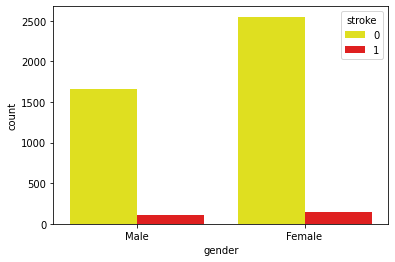

In [ ]:
# Checks which columns in the dataset have atleast one null value
def find_columns_with_null_value(dataframe):
    cols_list = dataframe.columns
    n_rows = len(dataframe)
    result = []
    for i in range(len(cols_list)):
        if dataframe.count()[i] < n_rows:
            result.append(cols_list[i])
            print('Number of missing values in ' + str(cols_list[i]) + ' = ' + str(n_rows - dataframe.count()[i]))
    return result

'''
Fills the missing values in a column by the median value
Reference: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
'''
def fill_missing_values_by_median(dataframe, column_name):
    dataframe[column].fillna(dataframe[column].median(), inplace = True)
    return dataframe

# Checking relation between gender and stroke
sns.countplot(x='gender', data = df, hue = 'stroke', palette=['yellow',"red"])

# Number of rows in the dataframe
print('Number of rows in the dataframe: ' + str(len(df)))

print('Column(s) with atleast one NULL value (missing value): ' + str(find_columns_with_null_value(df)))

df.info()

In [ ]:
''' 
This function assumes that there does not exist any column in the dataset which has numerical
values and which is categorical

Reference: https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
'''
def identify_categorical_columns(dataframe):
    cols_list = dataframe.columns
    numerical_cols_list = dataframe.select_dtypes('number').columns
    result = list(filter(lambda column: (column not in numerical_cols_list), set(cols_list)))
    return result

# Find out the columns which have categorical values
print('Categorical Columns: ' + str(identify_categorical_columns(df)))

df.info()


Categorical Columns: ['smoking_status', 'ever_married', 'gender', 'Residence_type', 'work_type']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4464 non-null   object 
 1   age                4464 non-null   float64
 2   hypertension       4464 non-null   int64  
 3   heart_disease      4464 non-null   int64  
 4   ever_married       4464 non-null   object 
 5   work_type          4464 non-null   object 
 6   Residence_type     4464 non-null   object 
 7   avg_glucose_level  4464 non-null   float64
 8   bmi                4279 non-null   float64
 9   smoking_status     4464 non-null   object 
 10  stroke             4464 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 547.5+ KB


In [ ]:
'''
The attributes 'work_type' and 'smoking_status' have many possible values, so it will be better to encode these columns using one-hot encoding.

'gender', 'ever_married', and 'Residence_type' attributes can be transformed into binary features using the LabelEncoder.
'''

# Encoding the 'work_type' and 'smoking_status' attributes using one-hot encoding
temp_columns = pd.get_dummies(df.work_type)
df.drop('work_type', axis = 1, inplace = True)
temp_df1 = df[[column for column in df.columns[:5]]]
temp_df1 = pd.concat([temp_df1, temp_columns], axis = 1)
temp_df2 = pd.get_dummies(df.smoking_status)
temp_df3 = df[[column for column in df.columns[5:8]]]
temp_df1 = pd.concat([temp_df1, temp_df3, temp_df2, df['stroke']], axis = 1)

# Encoding the 'gender', 'ever_married' and 'Residence_type' attributes using label encoding
label_encoder = LabelEncoder()

temp_df1['gender'] = label_encoder.fit_transform(temp_df1['gender'])
temp_df1['ever_married'] = label_encoder.fit_transform(temp_df1['ever_married'])
temp_df1['Residence_type'] = label_encoder.fit_transform(temp_df1['Residence_type'])

df = temp_df1

#df.info()

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Govt_job,Never_worked,Private,Self-employed,children,Residence_type,avg_glucose_level,bmi,Unknown,formerly smoked,never smoked,smokes,stroke
0,1,67.0,0,1,1,0,0,1,0,0,1,228.69,36.6,0,1,0,0,1
1,0,61.0,0,0,1,0,0,0,1,0,0,202.21,NaN,0,0,1,0,1
2,1,80.0,0,1,1,0,0,1,0,0,0,105.92,32.5,0,0,1,0,1
3,0,49.0,0,0,1,0,0,1,0,0,1,171.23,34.4,0,0,0,1,1
4,0,79.0,1,0,1,0,0,0,1,0,0,174.12,24.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,1,0,0,1,83.75,NaN,0,0,1,0,0
5106,0,81.0,0,0,1,0,0,0,1,0,1,125.20,40.0,0,0,1,0,0
5107,0,35.0,0,0,1,0,0,0,1,0,0,82.99,30.6,0,0,1,0,0
5108,1,51.0,0,0,1,0,0,1,0,0,0,166.29,25.6,0,1,0,0,0


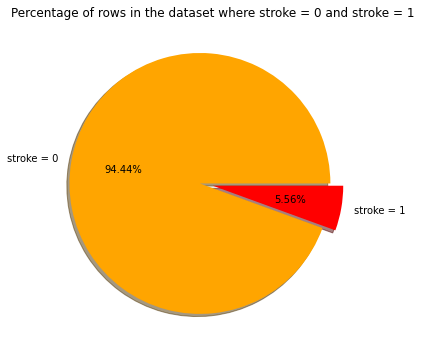

In [ ]:
'''
Check whether the dataset is balanced or imbalanced in terms of output labels.
'''

data_balance_check_labels = ['stroke = 0', 'stroke = 1']
total_instances_per_value = df['stroke'].value_counts()
pie_chart_colors = ['orange', 'red']
plt.figure(figsize=(6,6))
plt.pie(total_instances_per_value, labels = data_balance_check_labels, shadow = 1, explode = (0.1, 0), autopct='%1.2f%%', colors = pie_chart_colors)
plt.title('Percentage of rows in the dataset where stroke = 0 and stroke = 1')
plt.show()

In [ ]:
'''
This is the main problem in the dataset - the dataset is imbalanced. This might lead to overfit and the resulting model
will be biased towards predicting 'no stroke (stroke = 0)
'''
# Splitting the dataset into the train data (80%) and the test data (20%)
# Reference: https://stackoverflow.com/questions/42191717/scikit-learn-random-state-in-splitting-dataset

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

# Separating the input features and the output label from the training data and the test data
X_train_data = train_data.copy()
X_train_data = X_train_data.drop('stroke', axis = 1)
# X_train_data = train_data[[column for column in train_data.columns[:-1]]]
#y_train_data = train_data[[train_data.columns[len(train_data.columns) - 1]]]
y_train_data = train_data[['stroke']]
#X_test_data = test_data[[column for column in test_data.columns[:-1]]]
#y_test_data = test_data[[test_data.columns[len(test_data.columns) - 1]]]
X_test_data = test_data.copy()
X_test_data = X_test_data.drop('stroke', axis = 1)
y_test_data = test_data[['stroke']]
'''
If there are any missing values in any column, fill them by the median value of that column.
If we do this before the train-test split, there is a possibility of data leakage.
References: 
1. https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
2. https://www.analyticsvidhya.com/blog/2021/07/data-leakage-and-its-effect-on-the-performance-of-an-ml-model/
'''
for column in find_columns_with_null_value(X_train_data):
    X_train_data = fill_missing_values_by_median(X_train_data, column)

for column in find_columns_with_null_value(X_test_data):
    X_test_data = fill_missing_values_by_median(X_test_data, column)
    
print(sum(y_train_data.values.ravel()))
print(sum(y_test_data.values.ravel()))

Number of missing values in bmi = 140
Number of missing values in bmi = 45
196
52


# Scale the train and test data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
X_train_data_scaled = data_scaler.fit_transform(X_train_data)
X_test_data_scaled = data_scaler.transform(X_test_data)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler

# Oversample the training data using Synthetic Minority Oversampling Technique (SMOTE)
# Reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
smote_for_oversampling = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = smote_for_oversampling.fit_resample(X_train_data_scaled, y_train_data)
#X_test_data, y_test_data = smote_for_oversampling.fit_resample(X_test_data, y_test_data)
print(y_train_oversampled.value_counts())

# Random under-sampling removes the rows having majority class labels randomly
random_under_sampler = RandomUnderSampler(replacement = True, random_state = 42)

X_train_undersampled, y_train_undersampled = random_under_sampler.fit_resample(X_train_data_scaled, y_train_data)

print(y_train_undersampled.value_counts())

stroke
0         3375
1         3375
dtype: int64
stroke
0         196
1         196
dtype: int64


# Logistic Regression on the oversampled training data


Confusion Matrix: 
[[600 241]
 [ 11  41]]
Accuracy (in %): 71.78051511758119
Precision: 0.1453900709219858
Recall: 0.7884615384615384
F1 score: 0.2455089820359281


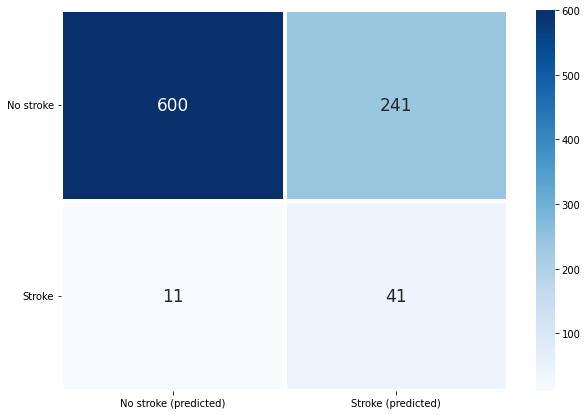

In [ ]:
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score


'''
References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
2. https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
3. https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
'''

# Training and testing a logistic regression model on the oversampled training data
# logistic_reg_pipeline =  make_pipeline(StandardScaler(), LogisticRegression(random_state = 42))
# logistic_reg_pipeline.fit(X_train_oversampled, y_train_oversampled.values.ravel())
logistic_reg = LogisticRegression(random_state = 42)
logistic_reg.fit(X_train_oversampled, y_train_oversampled.values.ravel())
# y_predicted_lr = logistic_reg_pipeline.predict(X_test_data_scaled)
y_predicted_lr = logistic_reg.predict(X_test_data_scaled)

confusion_matrix_lr = confusion_matrix(y_test_data, y_predicted_lr)
print('Confusion Matrix: ')
print(confusion_matrix_lr)

print('Accuracy (in %): ' + str(logistic_reg.score(X_test_data_scaled, y_test_data)*100))

precision_lr = precision_score(y_test_data, y_predicted_lr)
print('Precision: ' + str(precision_lr))

recall_lr = recall_score(y_test_data, y_predicted_lr)
print('Recall: ' + str(recall_lr))

f1_lr = f1_score(y_test_data, y_predicted_lr)
print('F1 score: ' + str(f1_lr))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_lr, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

# Support Vector Classifier on the oversampled training data


Confusion Matrix: 
[[679 162]
 [ 24  28]]
Accuracy (in %): 0.7917133258678611
Precision: 0.14736842105263157
Recall: 0.5384615384615384
F1 score: 0.23140495867768593


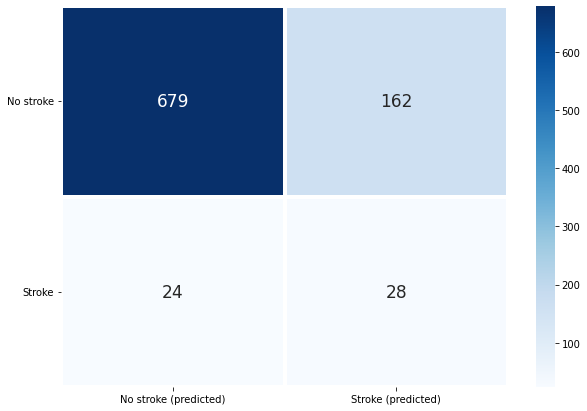

In [ ]:
from sklearn.svm import SVC


#Training and testing a SVM model on the oversampled training data
#svc_pipeline =  make_pipeline(StandardScaler(), SVC(random_state = 42))
#svc_pipeline.fit(X_train_oversampled, y_train_oversampled.values.ravel())

svc = SVC(random_state = 42)
svc.fit(X_train_oversampled, y_train_oversampled.values.ravel())
y_predicted_svc = svc.predict(X_test_data_scaled)

confusion_matrix_svc = confusion_matrix(y_test_data, y_predicted_svc)
print('Confusion Matrix: ')
print(confusion_matrix_svc)

print('Accuracy (in %): ' + str(svc.score(X_test_data_scaled, y_test_data)))

precision_svc = precision_score(y_test_data, y_predicted_svc)
print('Precision: ' + str(precision_svc))

recall_svc = recall_score(y_test_data, y_predicted_svc)
print('Recall: ' + str(recall_svc))

f1_svc = f1_score(y_test_data, y_predicted_svc)
print('F1 score: ' + str(f1_svc))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_svc, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Logistic Regression on the undersampled training data

Confusion Matrix: 
[[594 247]
 [  8  44]]
Accuracy (in %): 71.44456886898097
Precision: 0.15120274914089346
Recall: 0.8461538461538461
F1 score: 0.2565597667638484


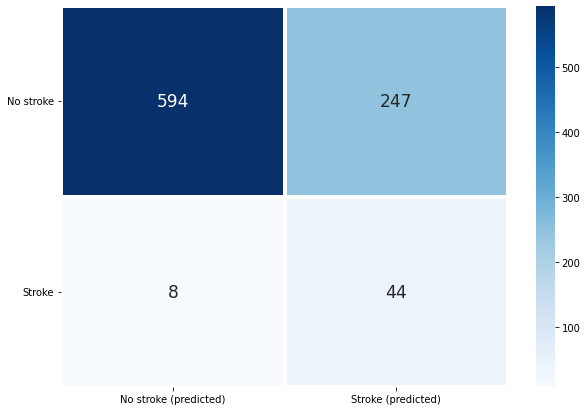

In [ ]:
# Training and testing a Logistic Regression model on the undersampled training data
logistic_reg_undersampled = LogisticRegression(random_state = 42)
logistic_reg_undersampled.fit(X_train_undersampled, y_train_undersampled.values.ravel())
# y_predicted_lr = logistic_reg_pipeline.predict(X_test_data_scaled)
y_predicted_lr_us = logistic_reg_undersampled.predict(X_test_data_scaled)

confusion_matrix_lr_us = confusion_matrix(y_test_data, y_predicted_lr_us)
print('Confusion Matrix: ')
print(confusion_matrix_lr_us)

print('Accuracy (in %): ' + str(logistic_reg_undersampled.score(X_test_data_scaled, y_test_data)*100))

precision_lr_us = precision_score(y_test_data, y_predicted_lr_us)
print('Precision: ' + str(precision_lr_us))

recall_lr_us = recall_score(y_test_data, y_predicted_lr_us)
print('Recall: ' + str(recall_lr_us))

f1_lr_us = f1_score(y_test_data, y_predicted_lr_us)
print('F1 score: ' + str(f1_lr_us))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_lr_us, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Support Vector Classifier on the undersampled training data


Confusion Matrix: 
[[552 289]
 [  9  43]]
Accuracy (in %): 0.6662933930571109
Precision: 0.12951807228915663
Recall: 0.8269230769230769
F1 score: 0.22395833333333334


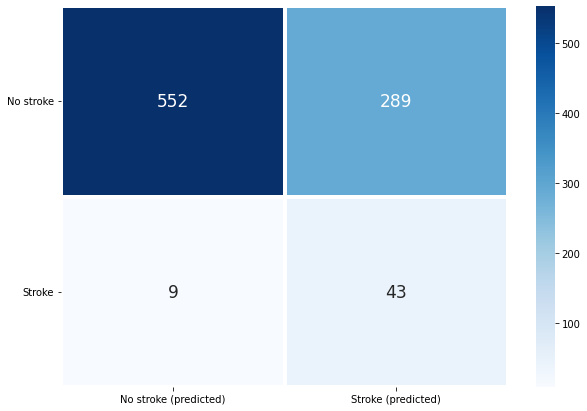

In [ ]:
# Training and testing a SVM model on the undersampled training data
svc_undersampled = SVC(random_state = 42)
svc_undersampled.fit(X_train_undersampled, y_train_undersampled.values.ravel())
y_predicted_svc_us = svc_undersampled.predict(X_test_data_scaled)

confusion_matrix_svc_us = confusion_matrix(y_test_data, y_predicted_svc_us)
print('Confusion Matrix: ')
print(confusion_matrix_svc_us)

print('Accuracy (in %): ' + str(svc_undersampled.score(X_test_data_scaled, y_test_data)))

precision_svc_us = precision_score(y_test_data, y_predicted_svc_us)
print('Precision: ' + str(precision_svc_us))

recall_svc_us = recall_score(y_test_data, y_predicted_svc_us)
print('Recall: ' + str(recall_svc_us))

f1_svc_us = f1_score(y_test_data, y_predicted_svc_us)
print('F1 score: ' + str(f1_svc_us))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_svc_us, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Neural network on the oversampled training data

In [ ]:
#from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [ ]:
# Training and testing neural network on the oversampled training data
nn_model = keras.Sequential([
    keras.layers.Dense(17, input_dim=17, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_oversampled, y_train_oversampled.values.ravel(), epochs=500)
    
print(nn_model.evaluate(X_test_data_scaled, y_test_data))
    
y_predicted_nn_model = nn_model.predict(X_test_data_scaled)
y_predicted_nn_model = np.round(y_predicted_nn_model)
    
print("Classification Report: \n", classification_report(y_test_data, y_predicted_nn_model))

Epoch 1/500
211/211 [==============================] - 1s 3ms/step - loss: 0.6304 - accuracy: 0.6674
Epoch 2/500
211/211 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7452
Epoch 3/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.7695
Epoch 4/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4754 - accuracy: 0.7784
Epoch 5/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4637 - accuracy: 0.7828
Epoch 6/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4534 - accuracy: 0.7844
Epoch 7/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.7901
Epoch 8/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.7905
Epoch 9/500
211/211 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.7947
Epoch 10/500
211/211 [==============================] - 1s 3ms/step - loss: 0.4261 - accura

In [ ]:
print(y_predicted_nn_model)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

#Neural network on the undersampled training data

In [ ]:
# Training and testing neural network on the undersampled training data
nn_model_us = keras.Sequential([
    keras.layers.Dense(17, input_dim=17, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_model_us.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy'])
nn_model_us.fit(X_train_undersampled, y_train_undersampled.values.ravel(), epochs=500)
    
print(nn_model_us.evaluate(X_test_data_scaled, y_test_data))
    
y_predicted_nn_model_us = nn_model_us.predict(X_test_data_scaled)
y_predicted_nn_model_us = np.round(y_predicted_nn_model_us)
    
print("Classification Report: \n", classification_report(y_test_data, y_predicted_nn_model_us))

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.7036 - accuracy: 0.4923
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5230
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5383
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5510
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5638
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5689
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5918
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.5995
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.6224
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6378
Epoch 11/

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Decision tree on the oversampled training data

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Residence_type', 'avg_glucose_level', 'bmi', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'stroke']
Confusion Matrix: 
[[645 196]
 [ 13  39]]
Accuracy (in %): 0.7659574468085106
Precision: 0.16595744680851063
Recall: 0.75
F1 score: 0.27177700348432055


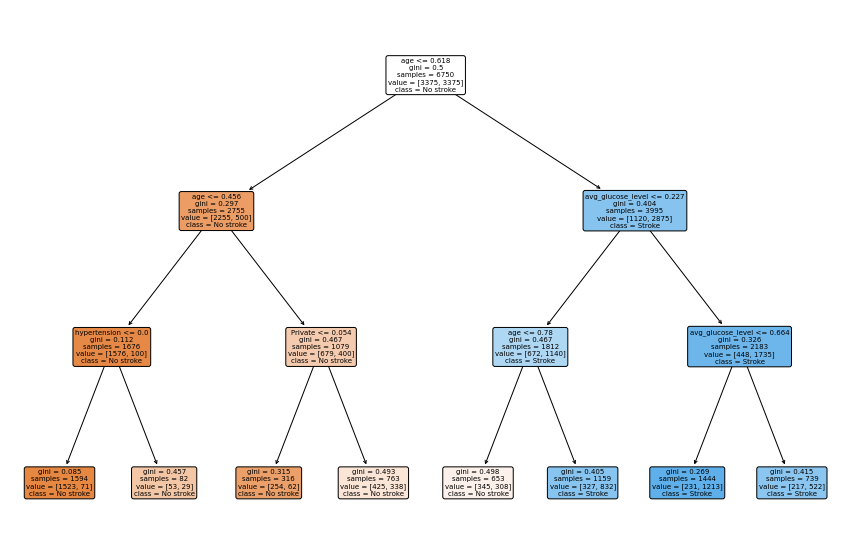

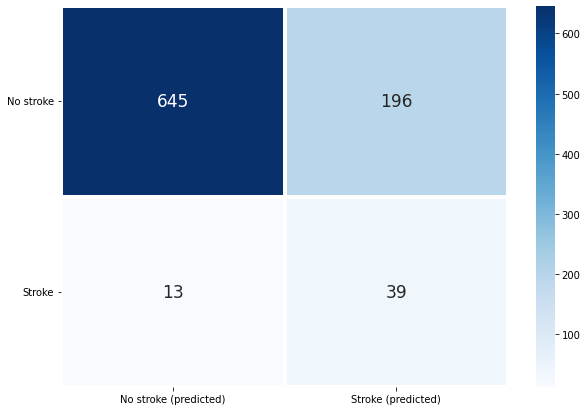

In [ ]:
# Training and testing decision trees on the oversampled training data
features = df.columns.tolist()
print(features)
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_leaf=5, max_depth=3)   
decision_tree_model.fit(X_train_oversampled,y_train_oversampled.values.ravel())
y_predicted_dt = decision_tree_model.predict(X_test_data_scaled)
# accuracy_score(y_test,y_predicted_dt)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree_model,
               feature_names = features, 
               class_names=["No stroke","Stroke"],
               rounded=True, 
               filled = True);

confusion_matrix_dt = confusion_matrix(y_test_data, y_predicted_dt)
print('Confusion Matrix: ')
print(confusion_matrix_dt)

print('Accuracy (in %): ' + str(decision_tree_model.score(X_test_data_scaled, y_test_data)))

precision_dt = precision_score(y_test_data, y_predicted_dt)
print('Precision: ' + str(precision_dt))

recall_dt = recall_score(y_test_data, y_predicted_dt)
print('Recall: ' + str(recall_dt))

f1_dt = f1_score(y_test_data, y_predicted_dt)
print('F1 score: ' + str(f1_dt))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_dt, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Decision tree on the undersampled training data

Confusion Matrix: 
[[661 180]
 [ 18  34]]
Accuracy (in %): 0.7782754759238522
Precision: 0.1588785046728972
Recall: 0.6538461538461539
F1 score: 0.2556390977443609


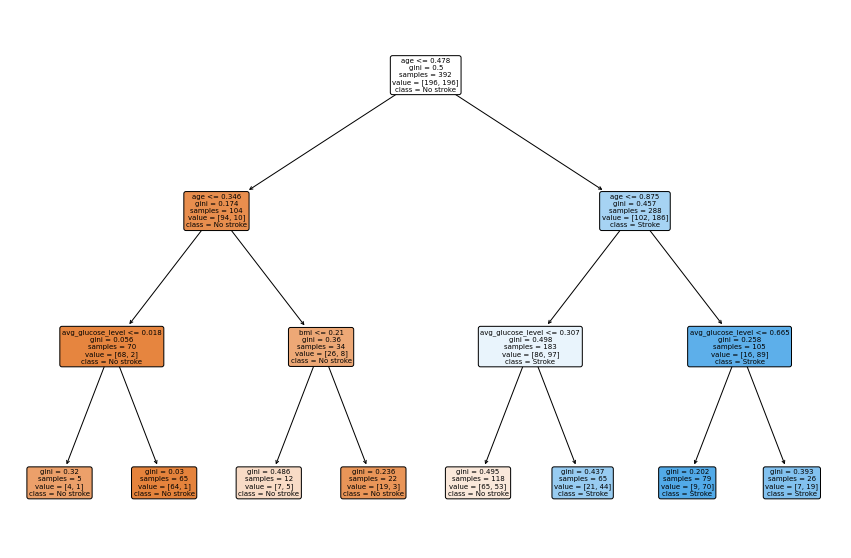

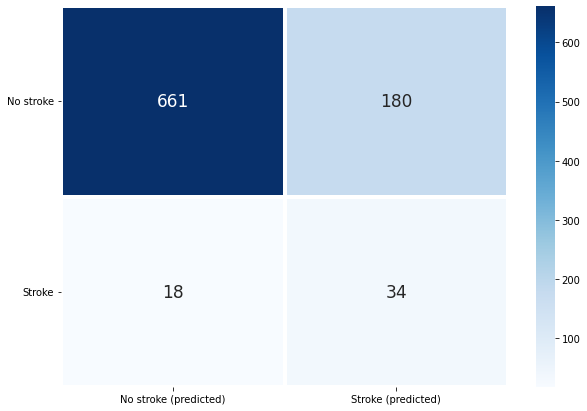

In [ ]:
# Training and testing decision trees on the undersampled training data
decision_tree_model_us = DecisionTreeClassifier(criterion="gini", random_state=0, min_samples_leaf=5, max_depth=3)  
decision_tree_model_us.fit(X_train_undersampled,y_train_undersampled.values.ravel())
y_predicted_dt_us = decision_tree_model_us.predict(X_test_data_scaled)
# accuracy_score(y_test,y_predicted_dt)

fig = plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree_model_us,
               feature_names = features, 
               class_names=["No stroke","Stroke"],
               rounded=True, 
               filled = True);

confusion_matrix_dt_us = confusion_matrix(y_test_data, y_predicted_dt_us)
print('Confusion Matrix: ')
print(confusion_matrix_dt_us)

print('Accuracy (in %): ' + str(decision_tree_model_us.score(X_test_data_scaled, y_test_data)))

precision_dt_us = precision_score(y_test_data, y_predicted_dt_us)
print('Precision: ' + str(precision_dt_us))

recall_dt_us = recall_score(y_test_data, y_predicted_dt_us)
print('Recall: ' + str(recall_dt_us))

f1_dt_us = f1_score(y_test_data, y_predicted_dt_us)
print('F1 score: ' + str(f1_dt_us))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_dt_us, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#Adaboost classifier on the oversampled training data

Confusion Matrix: 
[[647 194]
 [ 16  36]]
Accuracy (in %): 0.7648376259798432
Precision: 0.1565217391304348
Recall: 0.6923076923076923
F1 score: 0.25531914893617025


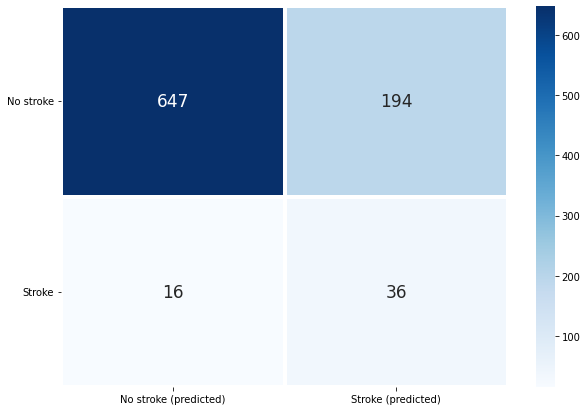

In [ ]:
# Training and testing adaboost on the oversampled training data
adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
adaboost_model = adaboost_classifier.fit(X_train_oversampled, y_train_oversampled.values.ravel())

y_predicted_adaboost = adaboost_model.predict(X_test_data_scaled)
# accuracy_score(y_test,y_predicted_dt)

confusion_matrix_adaboost = confusion_matrix(y_test_data, y_predicted_adaboost)
print('Confusion Matrix: ')
print(confusion_matrix_adaboost)

print('Accuracy (in %): ' + str(adaboost_model.score(X_test_data_scaled, y_test_data)))

precision_adaboost = precision_score(y_test_data, y_predicted_adaboost)
print('Precision: ' + str(precision_adaboost))

recall_adaboost = recall_score(y_test_data, y_predicted_adaboost)
print('Recall: ' + str(recall_adaboost))

f1_adaboost = f1_score(y_test_data, y_predicted_adaboost)
print('F1 score: ' + str(f1_adaboost))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_adaboost, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Adaboost classifier on the undersampled training data

Confusion Matrix: 
[[521 320]
 [ 15  37]]
Accuracy (in %): 0.6248600223964166
Precision: 0.10364145658263306
Recall: 0.7115384615384616
F1 score: 0.18092909535452323


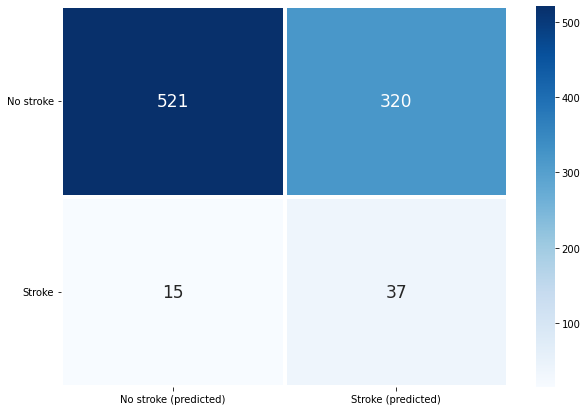

In [ ]:
#Training and testing adaboost on the undersampled training data
adaboost_classifier_us = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
adaboost_model_us = adaboost_classifier_us.fit(X_train_undersampled, y_train_undersampled.values.ravel())

y_predicted_adaboost_us = adaboost_model_us.predict(X_test_data_scaled)
# accuracy_score(y_test,y_predicted_dt)

confusion_matrix_adaboost_us = confusion_matrix(y_test_data, y_predicted_adaboost_us)
print('Confusion Matrix: ')
print(confusion_matrix_adaboost_us)

print('Accuracy (in %): ' + str(adaboost_model_us.score(X_test_data_scaled, y_test_data)))

precision_adaboost_us = precision_score(y_test_data, y_predicted_adaboost_us)
print('Precision: ' + str(precision_adaboost_us))

recall_adaboost_us = recall_score(y_test_data, y_predicted_adaboost_us)
print('Recall: ' + str(recall_adaboost_us))

f1_adaboost_us = f1_score(y_test_data, y_predicted_adaboost_us)
print('F1 score: ' + str(f1_adaboost_us))

# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (10, 7))
seaborn.heatmap(confusion_matrix_adaboost_us, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 3, cbar = True, annot_kws = {'fontsize': 17},
                xticklabels = ['No stroke (predicted)', 'Stroke (predicted)'], yticklabels = ['No stroke', 'Stroke'])
plt.yticks(rotation = 0)
plt.show()

#Fine Tuning AdaBoost using Grid Search on OverSampling Data


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
param_grid = { 
    'n_estimators': [20,50,100],
    'base_estimator' : [DecisionTreeClassifier(random_state=7),SVC()],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(algorithm='SAMME',random_state=7)

In [ ]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid,\
                      cv= 2, verbose=2)

In [ ]:
CV_abc.fit(X_train_oversampled, y_train_oversampled.values.ravel())

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=20; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=20; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=50; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=100; total time=   0.0s
[CV] END base_estimator=DecisionTreeClassifier(random_state=7), n_estimators=100; total time=   0.0s
[CV] END ..............base_estimator=SVC(), n_estimators=20; total time=  53.7s
[CV] END ..............base_estimator=SVC(), n_estimators=20; total time=  51.4s
[CV] END ..............base_estimator=SVC(), n_estimators=50; total time= 2.1min
[CV] END ..............base_estimator=SVC(), n_estimators=50; total time= 2.1min
[CV] END .....

GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=7),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=7),
                                            SVC()],
                         'n_estimators': [20, 50, 100]},
             verbose=2)

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.cv_results_['mean_test_score'])
print(sum(CV_abc.cv_results_['mean_test_score'])/ len(CV_abc.cv_results_['mean_test_score']))

{'base_estimator': DecisionTreeClassifier(random_state=7), 'n_estimators': 20}
[0.84296296 0.84296296 0.84296296 0.49985185 0.49985185 0.49985185]
0.6714074074074073


# GridSearch by using SVM for OverSampled Data


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    #'n_estimators': [200,150,100],
    #'max_depth':[10,20,30],
    #'max_features': ['auto', 'sqrt', 'log2']
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}


CV_rfc = GridSearchCV(estimator=SVC(random_state = 42), param_grid=param_grid,\
                      cv= 5, verbose=2)
CV_rfc.fit(X_train_oversampled, y_train_oversampled.values.ravel())
Y_predict=CV_rfc.predict(X_test_data_scaled)
  
  # Calculate Confusion Matrix
cf_mat=confusion_matrix(y_test_data,Y_predict)

  # Calculate Accuracy
acc = accuracy_score(y_test_data,Y_predict)

#Y_pred=model.predict(X_test_data_scaled)

  #Print Results
#print("************************"+m.__class__.__name__+"************************")
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)
  
print(classification_report(y_test_data, Y_predict))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .........................gamma=scale, kernel=linear; total time=   1.1s
[CV] END .........................gamma=scale, kernel=linear; total time=   1.1s
[CV] END .........................gamma=scale, kernel=linear; total time=   1.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   1.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   1.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   1.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   1.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   1.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   1.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   1.0s
[CV] END ............................gamma=scale, kernel=rbf; total time=   1.3s
[CV] END ............................gamma=scale,

#GridSearch by using Decison Tree for Oversampled data

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    #'n_estimators': [200,150,100],
    'max_depth':[10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'splitter':['best', 'rand']
    #'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma' : ['scale', 'auto']
}


CV_rfc = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 42), param_grid=param_grid,cv= 5, verbose=2)
CV_rfc.fit(X_train_oversampled, y_train_oversampled.values.ravel())
Y_predict=CV_rfc.predict(X_test_data_scaled)
  
  # Calculate Confusion Matrix
cf_mat=confusion_matrix(y_test_data,Y_predict)

  # Calculate Accuracy
acc = accuracy_score(y_test_data,Y_predict)

#Y_pred=model.predict(X_test_data_scaled)

  #Print Results
#print("************************"+m.__class__.__name__+"************************")
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)
  
print(classification_report(y_test_data, Y_predict))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 381, in fit
    splitter = SPLITTERS[self.splitter](
KeyError: 'rand'

  warnings.warn(some_fits_failed_message, Fit

#Gridsearch using SVM for Under sampled data

In [ ]:
param_grid = { 
    #'n_estimators': [200,150,100],
    #'max_depth':[10,20,30],
    #'max_features': ['auto', 'sqrt', 'log2']
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}


CV_rfc = GridSearchCV(estimator=SVC(random_state = 42), param_grid=param_grid,\
                      cv= 5, verbose=2)
CV_rfc.fit(X_train_undersampled, y_train_undersampled.values.ravel())
Y_predict=CV_rfc.predict(X_test_data_scaled)
  
  # Calculate Confusion Matrix
cf_mat=confusion_matrix(y_test_data,Y_predict)

  # Calculate Accuracy
acc = accuracy_score(y_test_data,Y_predict)

#Y_pred=model.predict(X_test_data_scaled)

  #Print Results
#print("************************"+m.__class__.__name__+"************************")
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)
  
print(classification_report(y_test_data, Y_predict))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............................gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ............................gamma=scale,

#Gridsearch using Decison Tree for Undersampled data

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    #'n_estimators': [200,150,100],
    'max_depth':[10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini','entropy'],
    'splitter':['best', 'rand']
    #'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma' : ['scale', 'auto']
}


CV_rfc = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 42), param_grid=param_grid,cv= 5, verbose=2)
CV_rfc.fit(X_train_undersampled, y_train_undersampled.values.ravel())
Y_predict=CV_rfc.predict(X_test_data_scaled)
  
  # Calculate Confusion Matrix
cf_mat=confusion_matrix(y_test_data,Y_predict)

  # Calculate Accuracy
acc = accuracy_score(y_test_data,Y_predict)

#Y_pred=model.predict(X_test_data_scaled)

  #Print Results
#print("************************"+m.__class__.__name__+"************************")
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)
  
print(classification_report(y_test_data, Y_predict))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, splitter=rand; total time=   0.0s
[CV] END criterion

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 381, in fit
    splitter = SPLITTERS[self.splitter](
KeyError: 'rand'

  warnings.warn(some_fits_failed_message, Fit

#Neural Network additional experiments on the oversampled training data

28/28 [==============================] - 0s 2ms/step - loss: 52.7223 - accuracy: 0.1523 - mse: 0.4810
[52.72229766845703, 0.15229563415050507, 0.48104360699653625]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.10      0.18       841
           1       0.06      0.98      0.12        52

    accuracy                           0.15       893
   macro avg       0.53      0.54      0.15       893
weighted avg       0.93      0.15      0.18       893



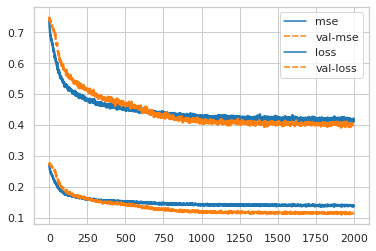

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(17, input_dim=17, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.0001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
hist = model.fit(X_train_oversampled, y_train_oversampled.to_numpy(), validation_split=0.1, verbose=0, epochs=2000)
    
print(model.evaluate(X_test_data, y_test_data))
    
y_preds_oversampled = model.predict(X_test_data)
y_preds_oversampled = np.round(y_preds_oversampled)
    
print("Classification Report: \n", classification_report(y_test_data, y_preds_oversampled))

mse = np.asarray(hist.history['mse'])
val_mse = np.asarray(hist.history['val_mse'])

# Creating the data frame
num_values = (len(mse))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mse
values[:,1] = val_mse

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mse", "val-mse"])

# Plotting
seaborn.set(style="whitegrid")
seaborn.lineplot(data=data, palette="tab10", linewidth=2.5)

loss = np.asarray(hist.history['loss'])
val_loss = np.asarray(hist.history['val_loss'])

# Creating the data frame
num_values = (len(loss))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = loss
values[:,1] = val_loss

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["loss", "val-loss"])

# Plotting
seaborn.set(style="whitegrid")
seaborn.lineplot(data=data, palette="tab10", linewidth=2.5)

28/28 [==============================] - 0s 2ms/step - loss: 65.3941 - accuracy: 0.7402 - mse: 0.2588
[65.39408874511719, 0.7402015924453735, 0.2587657570838928]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       841
           1       0.10      0.44      0.17        52

    accuracy                           0.74       893
   macro avg       0.53      0.60      0.51       893
weighted avg       0.91      0.74      0.81       893



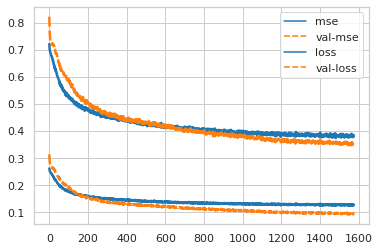

In [ ]:
# Implementing Early Stopping

model = keras.Sequential([
    keras.layers.Dense(17, input_dim=17, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, min_delta=0.01)
model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.0001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
hist = model.fit(X_train_oversampled, y_train_oversampled.to_numpy(), validation_split=0.1, verbose=0, epochs=2000, 
                 callbacks=[earlyStopping])
    
print(model.evaluate(X_test_data, y_test_data))
    
y_preds_oversampled = model.predict(X_test_data)
y_preds_oversampled = np.round(y_preds_oversampled)
    
print("Classification Report: \n", classification_report(y_test_data, y_preds_oversampled))

mse = np.asarray(hist.history['mse'])
val_mse = np.asarray(hist.history['val_mse'])

# Creating the data frame
num_values = (len(mse))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mse
values[:,1] = val_mse

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mse", "val-mse"])

# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)


loss = np.asarray(hist.history['loss'])
val_loss = np.asarray(hist.history['val_loss'])

# Creating the data frame
num_values = (len(loss))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = loss
values[:,1] = val_loss

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["loss", "val-loss"])

# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

#Neural Network additional experiments on the undersampled training data

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


28/28 [==============================] - 0s 2ms/step - loss: 90.1895 - accuracy: 0.0649 - mse: 0.9343
[90.189453125, 0.06494960933923721, 0.9342818260192871]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       841
           1       0.06      1.00      0.11        52

    accuracy                           0.06       893
   macro avg       0.53      0.50      0.06       893
weighted avg       0.95      0.06      0.02       893



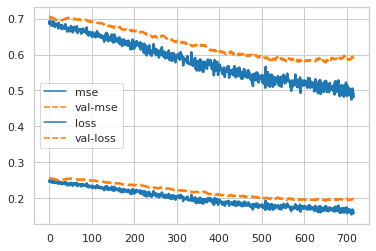

In [ ]:
# Implementing neural network with early stopping
from tensorflow_addons import losses
import tensorflow as tf
tf.random.set_seed(432)
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

model = keras.Sequential([
    keras.layers.Dense(17, input_dim=17, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

'''
model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.0001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
hist = model.fit(X_train_undersampled, y_train_undersampled.to_numpy(), validation_split=0.1, verbose=0, epochs=2000)
'''

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, min_delta=0.01)
model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.0001, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        ), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
hist = model.fit(X_train_undersampled, y_train_undersampled.to_numpy(), validation_split=0.1, verbose=0, epochs=2000, 
                 callbacks=[earlyStopping])

print(model.evaluate(X_test_data, y_test_data))
    
y_preds_undersampled = model.predict(X_test_data)
y_preds_undersampled = np.round(y_preds_undersampled)
    
print("Classification Report: \n", classification_report(y_test_data, y_preds_undersampled))

mse = np.asarray(hist.history['mse'])
val_mse = np.asarray(hist.history['val_mse'])

# Creating the data frame
num_values = (len(mse))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mse
values[:,1] = val_mse

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mse", "val-mse"])

# Plotting
seaborn.set(style="whitegrid")
seaborn.lineplot(data=data, palette="tab10", linewidth=2.5)


loss = np.asarray(hist.history['loss'])
val_loss = np.asarray(hist.history['val_loss'])

# Creating the data frame
num_values = (len(loss))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = loss
values[:,1] = val_loss

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["loss", "val-loss"])

# Plotting
seaborn.set(style="whitegrid")
seaborn.lineplot(data=data, palette="tab10", linewidth=2.5)

# Accuracy of Neural network - Oversampling model is good. Hence we are choosing this Model


In [ ]:
nn_model.save('/content/drive/MyDrive/StrokePrediction/model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/StrokePrediction/model.h5')
#model.predict(X_test)

In [ ]:
import pandas as pd
data={"id":[123,456,789,110,111],"gender":["Male","Female","Male","Female","Male"],"age":[67,30,45,27,15],"hypertension":[1,0,1,1,0],"heart_disease":[1,0,1,1,0],"ever_married":["Yes","No","Yes","Yes","No"],"work_type":["Private","Self-employed","Govt_job","Never_worked","children"],"Residence_type":["Urban","Rural","Urban","Urban","Urban"],"avg_glucose_level":[230.67,202.21,186.21,161.28,114.84],"bmi":[36.6,32.5,34.4,41.8,25.7],"smoking_status":["smokes","never smoked","formerly smoked","Unknown","formerly smoked"]}

df = pd.DataFrame(data)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,123,Male,67,1,1,Yes,Private,Urban,230.67,36.6,smokes
1,456,Female,30,0,0,No,Self-employed,Rural,202.21,32.5,never smoked
2,789,Male,45,1,1,Yes,Govt_job,Urban,186.21,34.4,formerly smoked
3,110,Female,27,1,1,Yes,Never_worked,Urban,161.28,41.8,Unknown
4,111,Male,15,0,0,No,children,Urban,114.84,25.7,formerly smoked


In [ ]:
df.drop('id', axis = 1, inplace = True)

df['gender'].value_counts()

Male      3
Female    2
Name: gender, dtype: int64

In [ ]:
# Check the 'age' attribute values
df.age.sort_values()
#temp_df_age = df[df['stroke'] == 1]['age']

#df.info()

# Check the least values of 'age' attribute
#print(temp_df_age.nsmallest(6))

# The age with value '1.32' seems invalid, it will be better to drop the instances with very small values of age
df = df[df['age'] > 13]


In [ ]:
# Since there is only 1 row with the gender as 'Other', we can drop it as it won't be much relevant in the analysis and prediction
df = df.drop(df.loc[df['gender'] == 'Other'].index)
df['gender'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5 non-null      object 
 1   age                5 non-null      int64  
 2   hypertension       5 non-null      int64  
 3   heart_disease      5 non-null      int64  
 4   ever_married       5 non-null      object 
 5   work_type          5 non-null      object 
 6   Residence_type     5 non-null      object 
 7   avg_glucose_level  5 non-null      float64
 8   bmi                5 non-null      float64
 9   smoking_status     5 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 612.0+ bytes


In [ ]:
# Checks which columns in the dataset have atleast one null value
def find_columns_with_null_value(dataframe):
    cols_list = dataframe.columns
    n_rows = len(dataframe)
    result = []
    for i in range(len(cols_list)):
        if dataframe.count()[i] < n_rows:
            result.append(cols_list[i])
            print('Number of missing values in ' + str(cols_list[i]) + ' = ' + str(n_rows - dataframe.count()[i]))
    return result

'''
Fills the missing values in a column by the median value
Reference: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
'''
def fill_missing_values_by_median(dataframe, column_name):
    dataframe[column].fillna(dataframe[column].median(), inplace = True)
    return dataframe

# Checking relation between gender and stroke
#sns.countplot(x='gender', data = df, hue = 'stroke', palette=['yellow',"red"])

# Number of rows in the dataframe
print('Number of rows in the dataframe: ' + str(len(df)))

print('Column(s) with atleast one NULL value (missing value): ' + str(find_columns_with_null_value(df)))

df.info()

Number of rows in the dataframe: 5
Column(s) with atleast one NULL value (missing value): []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5 non-null      object 
 1   age                5 non-null      int64  
 2   hypertension       5 non-null      int64  
 3   heart_disease      5 non-null      int64  
 4   ever_married       5 non-null      object 
 5   work_type          5 non-null      object 
 6   Residence_type     5 non-null      object 
 7   avg_glucose_level  5 non-null      float64
 8   bmi                5 non-null      float64
 9   smoking_status     5 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 612.0+ bytes


In [ ]:
''' 
This function assumes that there does not exist any column in the dataset which has numerical
values and which is categorical

Reference: https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
'''
def identify_categorical_columns(dataframe):
    cols_list = dataframe.columns
    numerical_cols_list = dataframe.select_dtypes('number').columns
    result = list(filter(lambda column: (column not in numerical_cols_list), set(cols_list)))
    return result

# Find out the columns which have categorical values
print('Categorical Columns: ' + str(identify_categorical_columns(df)))

df.info()


Categorical Columns: ['smoking_status', 'gender', 'Residence_type', 'ever_married', 'work_type']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5 non-null      object 
 1   age                5 non-null      int64  
 2   hypertension       5 non-null      int64  
 3   heart_disease      5 non-null      int64  
 4   ever_married       5 non-null      object 
 5   work_type          5 non-null      object 
 6   Residence_type     5 non-null      object 
 7   avg_glucose_level  5 non-null      float64
 8   bmi                5 non-null      float64
 9   smoking_status     5 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 612.0+ bytes


In [ ]:
# Encoding the 'work_type' and 'smoking_status' attributes using one-hot encoding
temp_columns = pd.get_dummies(df.work_type)
df.drop('work_type', axis = 1, inplace = True)
temp_df1 = df[[column for column in df.columns[:5]]]
temp_df1 = pd.concat([temp_df1, temp_columns], axis = 1)
temp_df2 = pd.get_dummies(df.smoking_status)
temp_df3 = df[[column for column in df.columns[5:8]]]
temp_df1 = pd.concat([temp_df1, temp_df3, temp_df2,], axis = 1)

# Encoding the 'gender', 'ever_married' and 'Residence_type' attributes using label encoding
label_encoder = LabelEncoder()

temp_df1['gender'] = label_encoder.fit_transform(temp_df1['gender'])
temp_df1['ever_married'] = label_encoder.fit_transform(temp_df1['ever_married'])
temp_df1['Residence_type'] = label_encoder.fit_transform(temp_df1['Residence_type'])

df = temp_df1
df

,gender,age,hypertension,heart_disease,ever_married,Govt_job,Never_worked,Private,Self-employed,children,Residence_type,avg_glucose_level,bmi,Unknown,formerly smoked,never smoked,smokes
0,1,67,1,1,1,0,0,1,0,0,1,230.67,36.6,0,0,0,1
1,0,30,0,0,0,0,0,0,1,0,0,202.21,32.5,0,0,1,0
2,1,45,1,1,1,1,0,0,0,0,1,186.21,34.4,0,1,0,0
3,0,27,1,1,1,0,1,0,0,0,1,161.28,41.8,1,0,0,0
4,1,15,0,0,0,0,0,0,0,1,1,114.84,25.7,0,1,0,0


In [ ]:
'''
The attributes 'work_type' and 'smoking_status' have many possible values, so it will be better to encode these columns using one-hot encoding.

'gender', 'ever_married', and 'Residence_type' attributes can be transformed into binary features using the LabelEncoder.
'''

#df = pd.get_dummies(df, drop_first=True)

#df


#df.info()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,32,1,1,230.67,35.5,1,1,1,0,1,0,1
1,30,0,0,202.21,32.5,0,0,0,1,0,1,0
2,45,1,1,186.21,34.4,1,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
df_scaled = data_scaler.fit_transform(df)


In [ ]:
prediction = model.predict(df_scaled)
print(np.round(prediction))

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]]
